<a href="https://colab.research.google.com/github/Miladatasys/sic_ai/blob/main/Diagn%C3%B3sticodelaRegresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
# Creación del dataset

def load_boston():
    data_url  = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df    = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)    # Separamos las columnas con espacios y en este caso no tenemos las columnas cabezeras
    data      = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])   # Combinamos parte de los datos en una nueva tabla en un orden específico, : significa tomar todas las columnas, mientras que 1::2 significa toma cualquier columna empezando por la segunda. :2 quiere decir toma solo las dos primeras columnas y dejalas juntas horizontalmente.
    target    = raw_df.values[1::2, 2]                                        # Extraemos la variable objetivo (el valor a predecir) y seleccionamos la segunda columna (index 2)
    return {'data': data, 'target': target, 'DESCR': 'boston dataset', 'feature_names': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT' ]} # Contiene el dataset ordenado con las características, la variable objetivo, descripción y una lista de nombres para cada columna

In [9]:
# Cargar dataset "Boston" con SKLEARN
data = load_boston()

In [10]:
# Mostrar las claves del diccionario

data.keys()

# Cada llave es única y se usa para ver el valor correspondiente. En este caso, data es un dict. Key() es el método que retorna una lista de todas las llaves en el dict.

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [11]:
# Mostrar la descripción de los datos

print(data['DESCR'])

# [] Accede a elementos de una lista, tupla o dict
#    Para diccionarios, [] se usa para ver el valor asociado a las claves específicas
# () Es parte del print

boston dataset


In [15]:
# Las variables explicativas

X       = data['data']          # Asignamos la variable X al valor de data
header  = data['feature_names'] # Accedemos a la clave en data dic que contiene los nombres de las columnas del dataset

In [16]:
# Las variables respuesta

Y       = data['target']         # Asignamos la variable Y al valor de data['target'] que queremos predecir
Y       = Y.reshape(-1,1)        # Este es un método que reforma el array en una forma de columnas de valores que se usan en ML

In [20]:
# Convierte los datos en un DataFrame y luego explora:

df          = pd.DataFrame(np.append(X, Y, axis = 1)) # Combina los datos y los convierte en un dataframe de pandas.
df.columns  = list(header)+['PRICE']                  # Es una lista de los nombres de las características como CRIM, ZN, etc. Y Price es una lista que contiene solo una string que representa la variable objetivo
df.head(5)                                            # Muestra las primeras 5 filas del dataframe


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
df.describe()                                         # Muestra estadísticas descriptivas de las columnas del dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
np.round(df.corr(), 2)                                # Muestra la correlación entre las columnas del DF con el rango entre -1 a 1, donde 1 indica una perfecta correlación positiva y -1 indica una perfecta correlación negativa, mientras que 0 no indica correlación y redondeamos el valor de la correlación a dos decimales

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


# Matriz de Correlación por Pares

Matriz de Correlación por Pares
La **matriz de correlación por pares** es una matriz que muestra los coeficientes de correlación entre todas las posibles combinaciones de un conjunto de variables. Cada celda en la matriz representa la correlación entre dos variables diferentes. La correlación mide la relación lineal entre dos variables, con valores que van desde -1 hasta 1:


*   1 indica una correlación positiva perfecta, donde las variables aumentan o disminuyen juntas.
*   0 indica que no hay correlación lineal entre las variables.
*   -1 indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye.

# Contexto y Uso
En análisis de datos, la matriz de correlación es útil para identificar relaciones entre variables. Es comúnmente utilizada en estadística, ciencia de datos y aprendizaje automático para:



*   Detectar multicolinealidad.
*   Identificar relaciones lineales entre variables.
*   Seleccionar características en modelos predictivos






In [25]:
# Ejemplo en Python con Pandas
# Aquí hay un ejemplo de cómo calcular una matriz de correlación por pares usando pandas en Python:

import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [10, 20, 30, 40, 50],
    'Variable3': [5, 4, 3, 2, 1]
}

df  = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

print(correlation_matrix)

           Variable1  Variable2  Variable3
Variable1        1.0        1.0       -1.0
Variable2        1.0        1.0       -1.0
Variable3       -1.0       -1.0        1.0


# Salida Esperada
La salida es una matriz simétrica donde cada elemento representa la correlación entre un par de variables:

                Variable1  Variable2  Variable3
Variable1 1.0 1.0 -1.0 Variable2 1.0 1.0 -1.0 Variable3 -1.0 -1.0 1.0

En este ejemplo:



*   Variable1 y Variable2 tienen una correlación perfecta positiva (1.0).
*   Variable1 y Variable3, así como Variable2 y Variable3, tienen una correlación perfecta negativa (-1.0).






# Tipos de Correlación
Pandas utiliza por defecto la correlación de Pearson, que mide la relación lineal. También se pueden calcular otros tipos de correlación como:



*   **Spearman**: Para relaciones monótonas.
*   **Kendall**: Para evaluar la concordancia entre variables.

Puedes especificar el método al calcular la matriz de correlación:

correlation_matrix = df.corr(method='spearman')


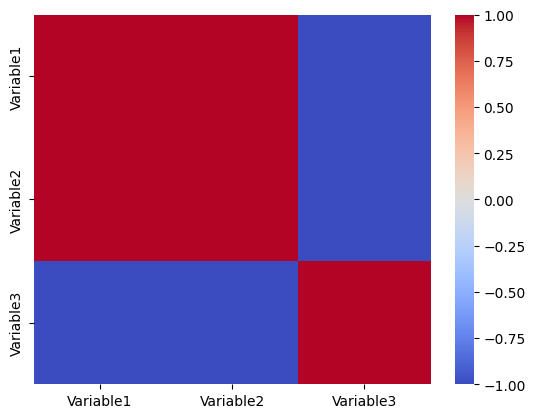

In [26]:
# Visualice la matriz de correlación.

sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# El mapa de calor muestra a la Variable 1 y 2 intersectadas, lo que indica una perfecta correlación positiva (Cuadrado rojo oscuro) y azul oscuro para la variable 1 y 3 indicando una perfecta correlación negativa

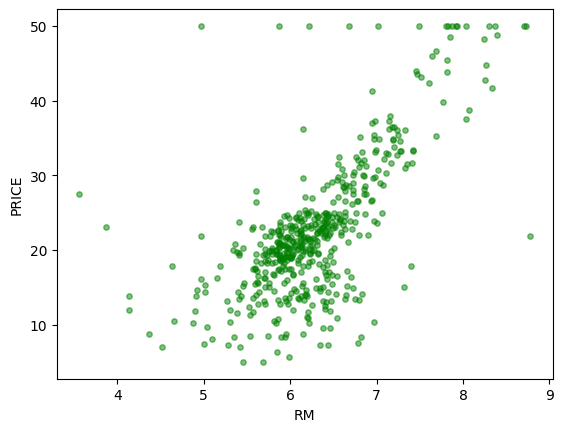

In [27]:
# Visualizar RM vs PRICE

plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

In [ ]:
# Continuaremos con Entrenar regresión lineal en el siguiente cuadernillo